# 4.9 Data Visualization with Python

# Contents :
1. Importing libraries and data
2. Creating Visualizations
3. Exporting Visualizations

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path to data folder
path = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 4 Python (Instacart Basket Analysis)\02 Data'

In [3]:
# Import merged data
merged_data = pd.read_pickle(os.path.join(path, 'prepared data', 'data merged.pkl'))

In [4]:
merged_data.head()

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,income,Unnamed: 0_x,...,price_range_loc,busiest day,busiest days,Busiest hours,max_order,loyalty_flag,avg_prices,spending_flag,order_frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443895,...,Mid range product,Regularly Busy Day,Busiest Days,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443897,...,Mid range product,Regularly Busy Day,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443898,...,Mid range product,Regularly Busy Day,Busiest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443892,...,Mid range product,Regularly Busy Day,Regularly Busy,Average orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665,443893,...,Mid range product,Regularly Busy Day,Slowest Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer


In [5]:
merged_data.shape

(30629741, 34)

# 2. Creating Visualizations

([<matplotlib.axis.XTick at 0x25610a724d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

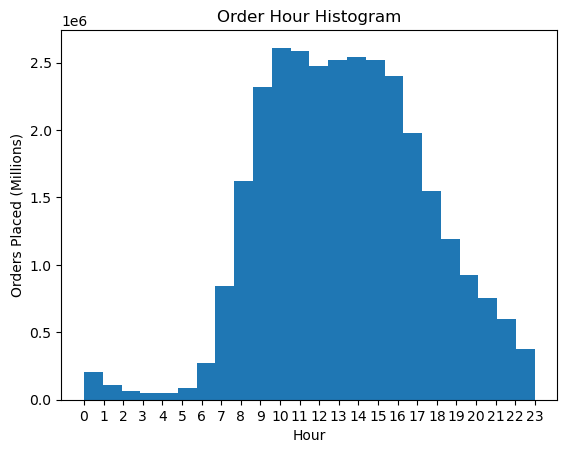

In [6]:
# Histogram for order hour of day

order_hour_hist = merged_data['hour_of_day_ordered'].plot.hist(bins = 24)
plt.title('Order Hour Histogram')
plt.xlabel('Hour')
plt.ylabel('Orders Placed (Millions)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

# The histogram shows that most orders are placed in the middle of the chart or from around 9am to around 5pm.  

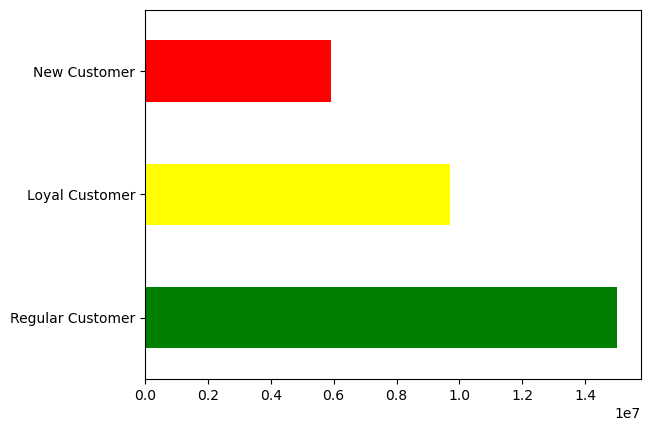

In [7]:
# Bar Chart for loyalty_flag

loyalty_flag_bar = merged_data['loyalty_flag'].value_counts().plot.barh(color = ['green', 'yellow', 'red'])

In [8]:
# Changing outliers to NaNs
merged_data.loc[merged_data['prices'] >100, 'prices'] = np.nan

In [9]:
merged_data['prices'].max()

25.0

In [10]:
# Creating random sample 
np.random.seed(5)
dev = np.random.rand(len(merged_data)) <= 0.7

In [11]:
# Splitting Data
big = merged_data[dev]
small = merged_data[~dev]


In [12]:
# Check
len(big) + len(small)

30629741

In [13]:
merged_data.shape

(30629741, 34)

([<matplotlib.axis.XTick at 0x2561924f070>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

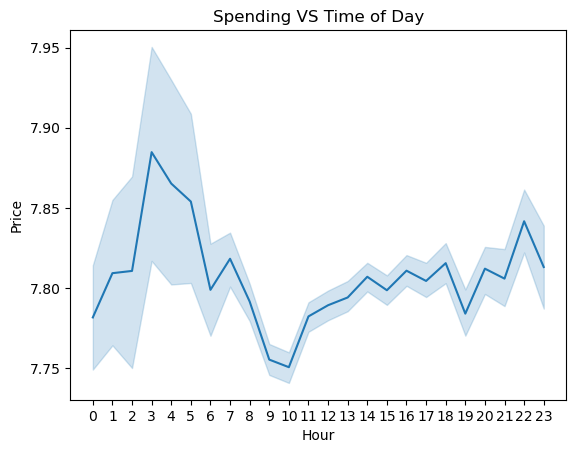

In [28]:
# Creating a line chart
line_prices_vs_order_hour = sns.lineplot(data = small, x = 'hour_of_day_ordered', y = 'prices')
plt.title('Spending VS Time of Day')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

In [15]:
# Creating data set from random sample with only relavent columns
df_2 = small[['Age', 'n_dependants']]

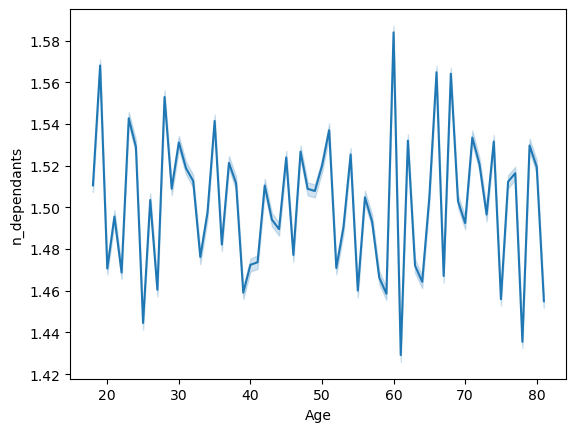

In [16]:
line_age_vs_dependants = sns.lineplot(data = merged_data, x = 'Age', y = 'n_dependants')

# The line chart is showing there is no noticeable connection between age and number of dependants

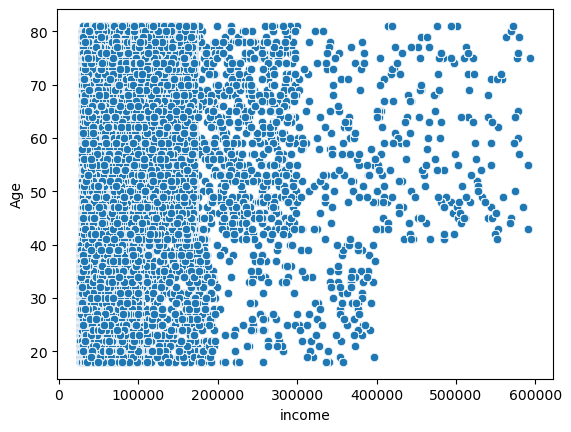

In [17]:
scatterplot_income_vs_age = sns.scatterplot(data = merged_data, x = 'income', y = 'Age')

# The Scatterplot is showing the data is left scewed meaning most peoples income is on the lower side of the chart however there is not really a relationship between age and income.

In [32]:
# Path to visualizations folder
path_2 = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 4 Python (Instacart Basket Analysis)\Visualizations'

Text(0, 0.5, 'Orders (millions)')

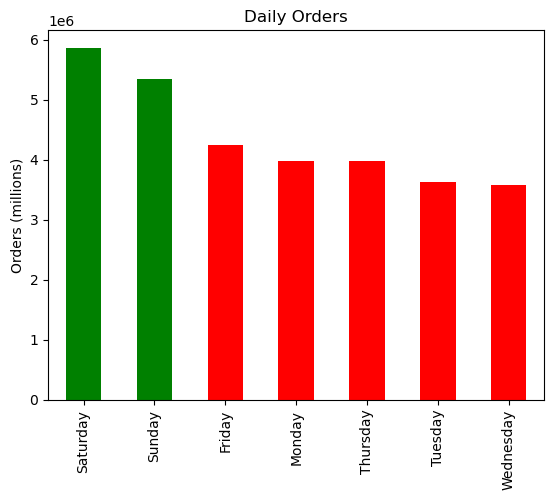

In [53]:
day_of_week_bar = merged_data['orders_day_of_week'].value_counts().plot.bar(title = 'Daily Orders', color = ['Green', 'Green', 'red', 'red', 'red', 'red', 'red'])
plt.ylabel('Orders (millions)')


# 3. Exporting Visualizations

In [29]:
order_hour_hist.figure.savefig(os.path.join(path_2, 'order_hour_histogram.png'), bbox_inches = 'tight')

In [30]:
loyalty_flag_bar.figure.savefig(os.path.join(path_2, 'loyalty_flag_bar_chart.png'), bbox_inches = 'tight')

In [31]:
line_prices_vs_order_hour.figure.savefig(os.path.join(path_2, 'Prices_vs_order_hour_line_chart.png'), bbox_inches ='tight')

In [22]:
line_age_vs_dependants.figure.savefig(os.path.join(path_2, 'age_vs_dependants_line_chart.png'))

In [23]:
scatterplot_income_vs_age.figure.savefig(os.path.join(path_2, 'income_vs_age_scatterplot.png'))

In [55]:
day_of_week_bar.figure.savefig(os.path.join(path_2, 'day_of_week_bar.png'), bbox_inches = 'tight')